# 1. 머신러닝(50점)
데이터 : 학생성적에 관한 소규모데이터 (student data)

## (1) 시각화 포함 탐색적 자료분석을 시행하시오 (20분)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# 데이터 불러와서 형태확인
df = pd.read_csv('./data/student_data.csv')
df.head()

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
0,GP,F,no,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6,5,6
1,GP,F,no,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5,5,5
2,GP,F,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8,7,8
3,GP,F,yes,yes,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15,15,14
4,GP,F,yes,no,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9,6,10


In [3]:
# 데이터 타입확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   paid        395 non-null    object 
 3   activities  395 non-null    object 
 4   famrel      394 non-null    float64
 5   freetime    393 non-null    float64
 6   goout       392 non-null    float64
 7   Dalc        391 non-null    float64
 8   Walc        393 non-null    float64
 9   health      391 non-null    float64
 10  absences    392 non-null    float64
 11  grade       395 non-null    int64  
 12  G1          395 non-null    int64  
 13  G2          395 non-null    int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 43.3+ KB


In [4]:
# 결측치 여부 확인
df.isna().sum()

school        0
sex           0
paid          0
activities    0
famrel        1
freetime      2
goout         3
Dalc          4
Walc          2
health        4
absences      3
grade         0
G1            0
G2            0
dtype: int64

In [5]:
# 비중으로도 확인
df.isna().sum()/len(df)

school        0.000000
sex           0.000000
paid          0.000000
activities    0.000000
famrel        0.002532
freetime      0.005063
goout         0.007595
Dalc          0.010127
Walc          0.005063
health        0.010127
absences      0.007595
grade         0.000000
G1            0.000000
G2            0.000000
dtype: float64

In [6]:
# 범주형과 수치형부터 확인
print(df.select_dtypes(object).columns)
print(df.select_dtypes('number').columns)

Index(['school', 'sex', 'paid', 'activities'], dtype='object')
Index(['famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'grade', 'G1', 'G2'],
      dtype='object')


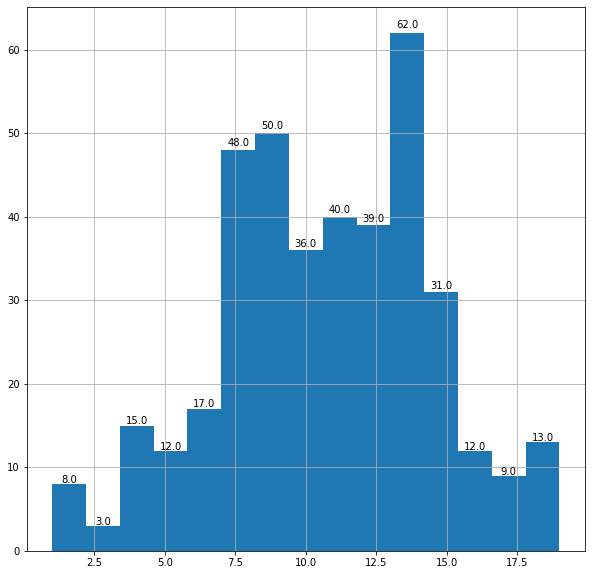

In [7]:
# grade 점수 분포 보기
plt.figure(figsize=(10,10))
ax = df['grade'].hist(bins=15)
for p in ax.patches: # ax범주개수(bins수)만큼 루프를 돌려서, get_bbox로 각 범주의 x시작점, y시작점, x길이, y길이 를 뽑아냅니다. 
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(f"{height:.1f}", (left+width/2, height*1.01), ha='center') # ax.annotate(값, (x위치, y위치), horizontalarray= 'center')

[판다스 그래프에 간단히 숫자 표시하기](https://dailyheumsi.tistory.com/98)

<AxesSubplot:>

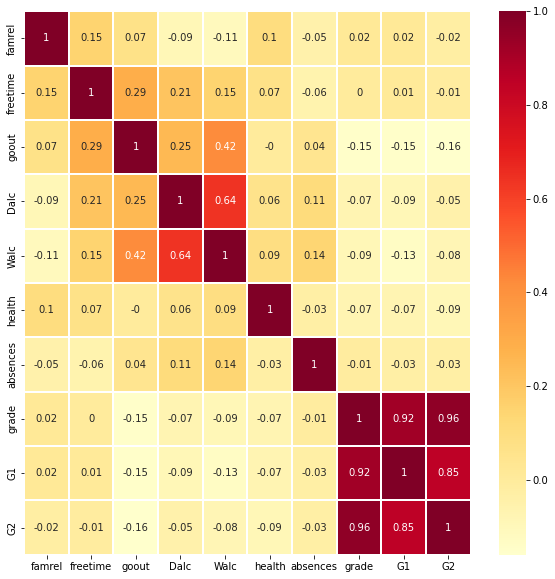

In [8]:
# 변수간 상관관계 보기
plt.figure(figsize=(10,10))
sns.heatmap(round(df.corr(),2),
            annot=True,
            cmap='YlOrRd',
            linewidths= 2) # linewidths를 넣어줘서 더 보기 좋도록

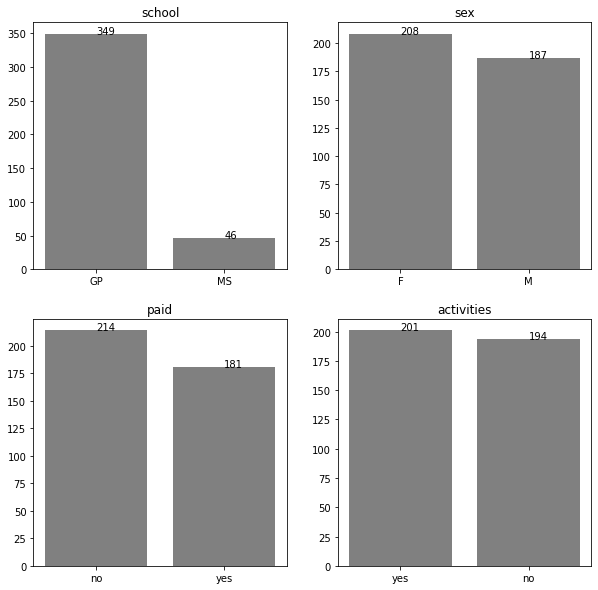

In [9]:
# 범주형 변수를 시각화 하여 확인하며, 비대칭 데이터는 아닌지 확인한다
fig, axs = plt.subplots(2,2, figsize= (10,10))

range_cols = df.select_dtypes(object).columns
for i, c in enumerate(range_cols):
        axs[i//2][i%2].bar(df[c].value_counts().index, df[c].value_counts().values, color='grey')
        axs[i//2][i%2].set_title(c)
        for ix, v in enumerate(df[c].value_counts().index): # 범주형인 x의 변수 갯수만큼 루프를 돌려서 plt.text(x위치, y위치, 값)으로 값을 그래프에 표시 가능합니다.
                axs[i//2][i%2].text(v, df[c].value_counts().values[ix],df[c].value_counts().values[ix])

### 해석
EDA를 진행하며 변수해석은 다음과 같이 6가지 정도로 할 수 있다.
1. 데이터 타입 확인 : 범주형, 수치형 등 확인, object타입은 인코딩으로 변환 필요가 있어보임
2. 결측치 존재여부 확인 : 4개의 변수에서 결측치가 존재하며 전체 변수에서 1% 내외임. float64 형태이므로 평균으로 대체하거나 KNN 사용할 수 있을 것으로 보임
3. 종속변수 분포 : 정규분포 유사한 형태
4. 종속변수와 독립변수의 상관관계 : 종속변수 grade와의 상관계수를 확인해보았을 때, 수치형 변수에서는 큰 상관성이 없었음. 파생변수 활용필요가 있어보임
5. 독립변수 상관관계 : 독립변수끼리의 상관관계를 확인해본 결과 다중공산성을 걱정할 만큼(0.9이상) 독립변수 끼리의 상관성이 큰 변수는 보이지 않음
6. 유의점 :독립변수 중 school의 경우 비대칭성이 있으므로 주의해야 한다.

## (2) 결측치를 식별 · 예측하는 두가지 방법을 쓰고 이를 선택한 방법을 설명하시오 (15분)

In [10]:
# 결측치가 있는 데이터 전체를 확인한다.
df[df.isna().any(axis=1)]

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
9,GP,M,yes,yes,5.0,5.0,NaN,1.0,1.0,5.0,0.0,15,14,15
14,GP,M,no,no,NaN,5.0,2.0,1.0,1.0,3.0,0.0,15,14,16
15,GP,F,no,no,4.0,4.0,4.0,1.0,2.0,2.0,NaN,14,14,14
25,GP,F,yes,no,1.0,2.0,2.0,1.0,NaN,5.0,14.0,8,6,9
39,GP,F,yes,yes,4.0,3.0,1.0,1.0,1.0,NaN,8.0,13,14,13
40,GP,F,no,yes,3.0,3.0,NaN,1.0,2.0,3.0,25.0,9,7,10
49,GP,F,no,yes,4.0,4.0,4.0,1.0,1.0,NaN,2.0,7,7,7
61,GP,F,no,yes,5.0,5.0,5.0,NaN,5.0,5.0,6.0,10,10,8
71,GP,M,no,no,3.0,3.0,3.0,NaN,1.0,3.0,0.0,10,10,10
82,GP,F,yes,no,4.0,4.0,4.0,1.0,1.0,5.0,NaN,6,7,6


결측치를 식별 예측하는 방법으로는 1) 단순대치법 과 2) KNN을 활용한 결측치 대체가 있다.
1) 단순대치법 : 수치형 변수인 경우는 평균이나 중앙값을, 범주형은 최빈값을 사용하여 대치
2) KNN대치법 : 결측치가 없는 최근접 이웃 알고리즘을 통해 결측치가 없는 데이터를 대체한다. 단 계산이 가능한 수치형변수만 사용 가능.

In [11]:
# KNN을 이용한 대체를 적용해본다
from sklearn.impute import KNNImputer

# 결측치가 있는 수치형 데이터만을 추출
knn_df = df[df.columns.difference(range_cols)]

# 모델링
imputer = KNNImputer(n_neighbors=2)
filled_df = imputer.fit_transform(knn_df)
filled_df = pd.DataFrame(filled_df, columns= knn_df.columns)
df[knn_df.columns] = filled_df
df.isna().sum()

school        0
sex           0
paid          0
activities    0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
grade         0
G1            0
G2            0
dtype: int64

KNN기법을 통해 모든 결측치를 대체하였다

## (3) 범주형 변수 인코딩이 필요한 경우를 식별하고, 변환을 적용하시오. (15분)

범주형 변수가 모두 이산형 변수이므로 boolean 타입으로 변경하여, 머신러닝에서 변수 사용을 가능하도록 변환한다. 판다스의 get_dummies를 활용

In [12]:
df = pd.get_dummies(df, range_cols, drop_first= True)
df.head()

,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2,school_MS,sex_M,paid_yes,activities_yes
0,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6.0,5.0,6.0,0,0,0,0
1,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5.0,5.0,0,0,0,0
2,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8.0,7.0,8.0,0,0,1,0
3,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15.0,15.0,14.0,0,0,1,1
4,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9.0,6.0,10.0,0,0,1,0


## (4) 데이터 분할 방법을 2가지 쓰고 적절한 데이터 분할을 적용하시오. <br> 이를 선택한 이유를 설명하시오 (15분)

데이터 분할 기법으로는 무작위로 분할하는 랜덤분할 방식, 범주형 종속변수 대상으로는 종속변수 클래스의 비율을 기준으로 학습용데이터, 테스트용 데이터의 비율을 동일하게 분할하는 층화추출방식이 있다. <br>
해당 데이터는 종속변수가 연속형 · 수치형으로 회귀분석을 사용한다. 따라서 랜덤분할 방식을 써도 무방하다.

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop('grade', axis=1)
y = df['grade']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size= 0.3,
                                                    random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(276, 13) (119, 13) (276,) (119,)


## (5) svm, xgboost, randomforest 3개의 알고리즘의 공통점을 쓰고 학생성적 예측분석에 적합한 알고리즘인지 설명하시오 [15분]

3개 알고리즘의 공통점은 다음과 같다.<br>
1. 회귀분석과 분류분석을 모두 할 수 있는 분석 알고리즘이다.
2. 모두 범주형 변수를 독립변수로 사용할 수 없어 변환을 해주어야 한다.
3. 과대적합, 과소적합을 회하기 위한 매개변수의 설정이 필요하다.
4. 회귀분석에서 다중공산성의 문제를 해결할 수 있다.
<br><br>
해당 데이터에서는 얀속형 종속변수이므로 회귀분석이 적합하다. 회귀분석에서 다중공산성을 해결


## (6) 세가지 모델 모두 모델링 해보고 가장 적합한 알고리즘을 선택하시오. 이를 선택한 이유와 모델의 한계점, 보완가능한 부분을 설명하고, 현업에서 주의할 점에 대해 기술하시오 [30분]

In [14]:
!pip install xgboost

In [29]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test),columns = X_test.columns)

# svm
param_grid = [
    {'C':[0.1,1,10,100],'gamma':[0.001, 0.01, 0.1, 1, 10]}
    ]

grid_svm = GridSearchCV(SVR(), param_grid = param_grid, cv=5)
grid_svm.fit(X_train_scaled, y_train)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values('mean_test_score', ascending = False)




,C,gamma,mean_test_score
15,100.0,0.001,0.960851
11,10.0,0.010,0.955432
16,100.0,0.010,0.947585
10,10.0,0.001,0.938622
6,1.0,0.010,0.917604
12,10.0,0.100,0.878451
17,100.0,0.100,0.873963
7,1.0,0.100,0.805831
5,1.0,0.001,0.293223
2,0.1,0.100,0.288421


In [16]:
svr = SVR(C=100, gamma=0.001)
svr.fit(X_train_scaled, y_train)

print('R2:', svr.score(X_test_scaled, y_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, svr.predict(X_test_scaled))))

R2: 0.9303193307393616
RMSE: 0.875540411477529


In [17]:
# random forest regression

rf_grid = [
    {'max_depth':[2,4,6,8,10], 'min_samples_split':[2, 4, 6, 8, 10]}
]

rf = GridSearchCV(RandomForestRegressor(n_estimators=100),param_grid=rf_grid, cv=5)
rf.fit(X_train_scaled, y_train)
rf.best_params_

print('R2:', rf.score(X_test_scaled, y_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, rf.predict(X_test_scaled))))

R2: 0.9250527402030821
RMSE: 0.9080252366905524


In [33]:
# xgboost
xgb_grid =[
    {'max_depth':[2,4,6,8,10]}
]
xgb = GridSearchCV(XGBRegressor(n_estimators = 1000), param_grid= xgb_grid, cv=5)
xgb.fit(X_train_scaled, y_train)
xgb.best_params_

print('R2:',xgb.score(X_test_scaled, y_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, xgb.predict(X_test_scaled))))


R2: 0.9216718150480331
RMSE: 0.928280165632204


In [19]:
result_xgb = pd.DataFrame(xgb.cv_results_['params'])
result_xgb['mean_test_score'] = xgb.cv_results_['mean_test_score']
result_xgb.sort_values('mean_test_score', ascending = False)

,max_depth,mean_test_score
2,6,0.962357
3,8,0.961900
4,10,0.961887
1,4,0.957904
0,2,0.945253


SVR에서의 R2점수가 가장 높고, 에러율이 가장 낮음. SVR 모델을 선택한다.

각 모델에서의 변수의 중요도 구하기

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

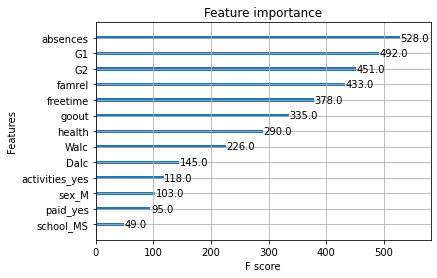

In [34]:
# xgb = XGBRegressor(n_estimators = 1000,max_depth=6)

from xgboost import plot_importance
plot_importance(xgb.best_estimator_)

In [21]:
result = pd.DataFrame(rf.cv_results_['params'])
result['mean_test_score'] = rf.cv_results_['mean_test_score']
result.sort_values('mean_test_score', ascending = False)

,max_depth,min_samples_split,mean_test_score
16,8,4,0.963787
12,6,6,0.963580
22,10,6,0.963003
17,8,6,0.962951
10,6,2,0.962935
24,10,10,0.962422
11,6,4,0.962330
13,6,8,0.961880
23,10,8,0.961845
15,8,2,0.961790


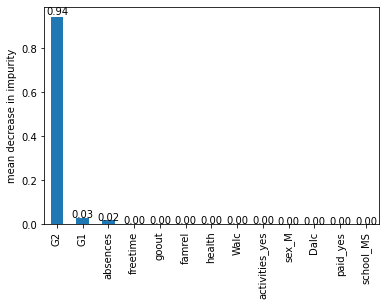

In [22]:
rf = RandomForestRegressor(max_depth=10,min_samples_split=6)
rf.fit(X_train_scaled, y_train)
ax = pd.Series(rf.feature_importances_, index=rf.feature_names_in_).sort_values(ascending= False).plot.bar(ylabel = 'mean decrease in impurity')
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(f"{height:.2f}", (left+width/2, height*1.01), ha='center')


svr은 feature_importance_을 구할 수 없고 permutation feature importance는 구할 수 있다
https://stackoverflow.com/questions/70467781/feature-importance-with-svr

In [23]:
round(2.222,1)

2.2

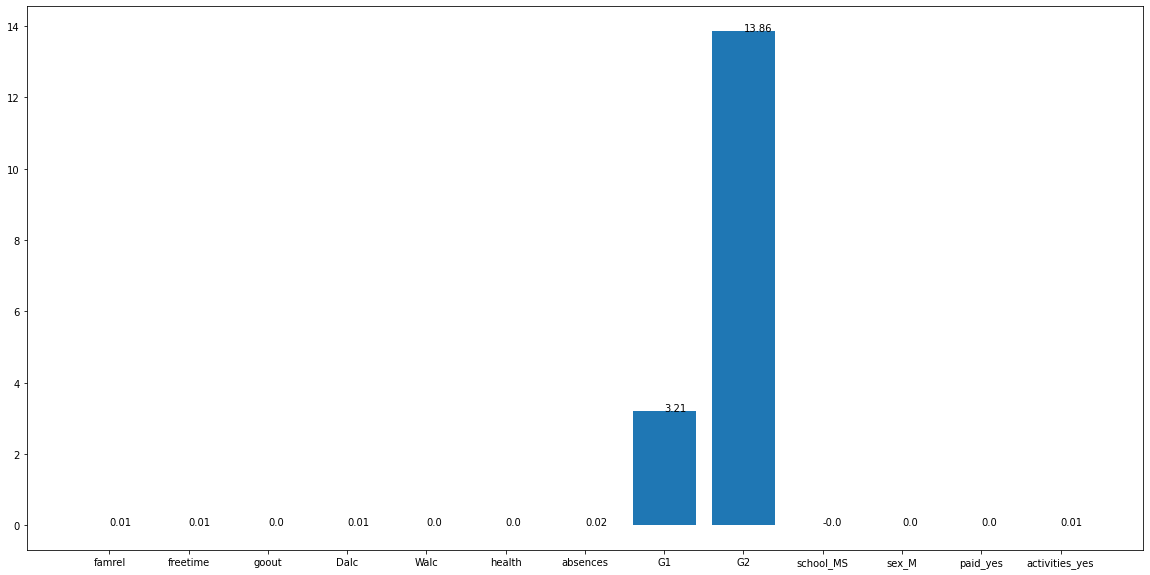

In [35]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
results = permutation_importance(svr, X_train_scaled, y_train, scoring='neg_mean_squared_error')
importance = results.importances_mean
plt.figure(figsize=(20,10))
plt.bar([x for x in X_train_scaled.columns], importance)
for ix, v in enumerate([x for x in X_train_scaled.columns]):
    plt.text(v, importance[ix],round(importance[ix],2))


# 통계분석 (50점)
## 1. 회귀분석
연속형 독립변수 1개, 종속변수 1개로 구성된 보스턴 집값 데이터 세트


### (1) 데이터를 8:2로 분할하고 선형 회귀를 적용하시오. 결정계수와 RMSE를 구하시오.[30분]

In [36]:
!pip install mglearn

In [ ]:
import pandas as pd
import numpy as np
import mglearn
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
print("결정계수:",lr.score(X_test, y_test))
print("RMSE",np.sqrt(mean_squared_error(y_test, lr.predict(X_test))))


결정계수: 0.6158858584078949
RMSE 5.592657237078496


c:\Dev\Miniconda\envs\py38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 

Linear Regression으로 간단한 선형 회귀 모델을 만들고 20%의 테스트 데이터세트로 검증하였다. 모델의 정확도는 약61.5%이며, RMSE는 5.6이었다

### (2) 데이터를 8:2로 분할하고 릿지 회귀를 적용하시오. alpha값을 0부터 1까지 0,1 단위로 모두 탐색해서 결정계수가 가장 높을 때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산하시오

In [37]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

alpha = np.arange(0, 1.1, 0.1)

param_grid = [
    {'alpha' : alpha}
]

grid_ridge = GridSearchCV(Ridge(), param_grid= param_grid)
grid_ridge.fit(X_train, y_train)

GridSearchCV(estimator=Ridge(),
             param_grid=[{'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}])

In [38]:
results = pd.DataFrame(grid_ridge.cv_results_['params'])
results['score'] = grid_ridge.cv_results_['mean_test_score']
results.sort_values('score', ascending =False)


,alpha,score
10,1.0,0.961015
9,0.9,0.961008
8,0.8,0.961001
7,0.7,0.960993
6,0.6,0.960986
5,0.5,0.960978
4,0.4,0.960971
3,0.3,0.960963
2,0.2,0.960956
1,0.1,0.960948


In [39]:
# alpha를 0.1로 찾았습니다. 다시 이를 셋팅하여 모델을 생성/학습합니다.

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
print(ridge.score(X_test,y_test))
print(np.sqrt(mean_squared_error(y_test, ridge.predict(X_test))))

0.9576107960089675
0.6828851523507499


정확도는 74.6%, 오차는 4.5인 모델이 릿지를 통해 생성되었습니다. <br>
기존 선형분석보다는 나은 정확도와 오차를 보입니다.

### (3) 데이터를 8:2로 분할하고 라쏘 회귀를 적용하시오. alpha 값을 0부터 1까지 0,1 단위로 모두 탐색해서 결정계수가 가장 높을 때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산하시오

In [40]:
from sklearn.linear_model import Lasso

alpha = np.arange(0, 1.1, 0.1)
param_grid = [
    {'alpha':alpha}
    ]
grid_lasso = GridSearchCV(Lasso(), param_grid= param_grid)
grid_lasso.fit(X_train,y_train)

print(grid_lasso.best_params_)
print(grid_lasso.score(X_test,y_test))
print(np.sqrt(mean_squared_error(y_test, grid_lasso.predict(X_test))))

c:\Dev\Miniconda\envs\py38\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
c:\Dev\Miniconda\envs\py38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Dev\Miniconda\envs\py38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.285e+01, tolerance: 3.314e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  mo

{'alpha': 0.1}
0.9568471401433889
0.6890088987641675


라쏘 회귀의 경우 정확도가 69%로 릿지 회귀보다는 낮아졌으며 오류는 5.0 정도이다. 보다 정확한 모델을 원할 경우 단순선형회귀가 아닌 다항 회귀 등의 방법을 적용하는 것이 바람직하다.

## 2. 다항 회귀분석 시각화
단순 선형회귀를 다항 회귀로 3차까지 적용시켜 계수를 구하고 3차항을 적용한 모델의 스캐터플롯 과 기울기의 선을 그리시오<br>
<img src='./img/08-01.png' width='800'>

위의 그림에서 주황색의 실제 샘플값을 파란 회귀선이 예측하는데 한계가 있는 것을 볼 수 있다. 즉,
단순회귀를 다항회귀로 적용시키는 문제로, sklearn의 전처리함수인 polynominal을 활용하여, 설명변수를 다항화할 수 있다. 

In [ ]:
#  기준이 될 데이터 만들기 

import pandas as pd
import numpy as np

X = 6 * np.random.rand(100,1)-3
y = 3* (X**3 + X**2+ X + np.random.randn(100,1)) # y 값은 다항으로 주어진 것을 가정한다 
line = np.linspace(-3,3,100,endpoint=False).reshape(-1,1) # 예측 값을 위해 생성 (X_test)
print(X.shape, line.shape)

(100, 1) (100, 1)


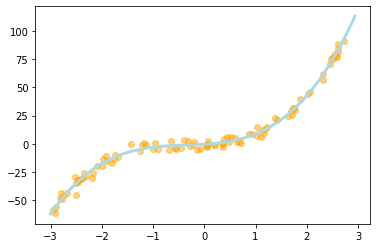

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

# x를 3차항 형태로 변형하여, 선형모델을 학습한다.
poly = PolynomialFeatures(degree= 3, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X) # 학습값 적용
line_poly = poly.transform(line) # 테스트값 적용

reg = LinearRegression().fit(X_poly, y) #학습

plt.plot(line, reg.predict(line_poly), c = 'lightblue', lw=3) # 예측
plt.scatter(X, y, c ='orange', alpha=0.5)

In [ ]:
print(reg.score(line_poly, reg.predict(line_poly)))


1.0


100%의 정확도를 보이는 것을 확인, 데이터의 형태에 맞는 모델을 쓰는 것이 얼마나 중요한가를 보여주는 사례이다.

## 3. ANOVA 분석
변수 3개(하나는 범주형 변수 / 나머지 두개는 수치형연속변수)의 이원분산분석을 수행하고 통계표를 작성하시오 [20분]

ANOVA분석 은 서로 다른 그룹간의 종속변수가 차이가 있는지를 비교하는데 사용하는 방식입니다.<br>
즉, 설명변수는 단수 또는 복수의 범주형 데이터가 올 수 있으며 종속변수는 수치형 데이터가 오게 됩니다.
예를 들면, LG TV의 국가 간, 또는 모델 간 고객 만족도 점수의 차이가 있는지를 확인하기 위해 쓰입니다.
ANOVA의 통계량 결과는 'F통계량'입니다. 이 비율은 그룹 간 분산의 차이를 보여주며, 그룹간의 유의미한 차이가 있을수록 F비율이 커지고, P-value에 따라 귀무가설이 기각 됩니다.
[ANOVA분석 - 자세히 공부하기](https://www.tibco.com/ko/reference-center/what-is-analysis-of-variance-anova#:~:text=%EB%B6%84%EC%82%B0%20%EB%B6%84%EC%84%9D%20(%20ANOVA%20)%EC%9D%80%20%EC%84%9C%EB%A1%9C,%EC%B0%A8%EC%9D%B4%EA%B0%80%20%EC%9E%88%EB%8A%94%EC%A7%80%20%ED%99%95%EC%9D%B8%ED%95%A9%EB%8B%88%EB%8B%A4.)

아래 아보카도 데이터의 경우도 region, type에 따라 AveragePrice의 차이가 있는지를 확인하기 위해 ANOVA 분석을 사용했습니다. 

In [1]:
import pandas as pd 
import numpy as np

avocado = pd.read_csv('./data/avocado.csv')
avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
avocado.select_dtypes(object).columns 
# 범주형 변수는 타입, 지역만 있는 것을 확인, 범주형 변수부터 주효과분석을 진행

Index(['Date', 'type', 'region'], dtype='object')

### 범주형 변수 주효과 분석에 대한 가설
|가설|내용|
|---|:---:|
| 귀무가설1 | region에 따른 AveragePrice의 차이는 존재하지 않는다 |
| 귀무가설2 | type에 따른 AveragePrice의 차이는 존재하지 않는다 |

In [30]:

cities = ['Boston','Orlando','Chicago']
avocado = avocado[avocado['region'].isin(cities)].reset_index(drop=True)

AveragePrice = avocado['AveragePrice']
avocado_type = avocado['type']
region = avocado['region']

# 분산분석
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
f = 'AveragePrice ~ C(avocado_type) * C(region)'
model = ols(f, avocado).fit()
aov_table = anova_lm(model, typ = 2)
aov_table

,sum_sq,df,F,PR(>F)
C(avocado_type),56.111007,1.0,828.218296,1.989417e-133
C(region),0.432136,2.0,3.189242,4.161918e-02
C(avocado_type):C(region),1.878817,2.0,13.866003,1.146622e-06
Residual,68.291047,1008.0,NaN,NaN


상호작용에 대한 검정결과는 C(avocado_type):C(region) 행의 p-value 값을 보고 판단할 수 있다. 유의수준 0.05로 귀무가설을 기각하여 상호 작용효과가 있다고 할 수있다. 또한 주효과 검정도 모두 유의수준 0.05 하에서 유의하므로 각 변수의 종류에 따른 AveragePrice의 차이가 있다고 할 수 있다.

더 직관적으로 판단하기 위해 그래프로 해당 모델을 표현하였다

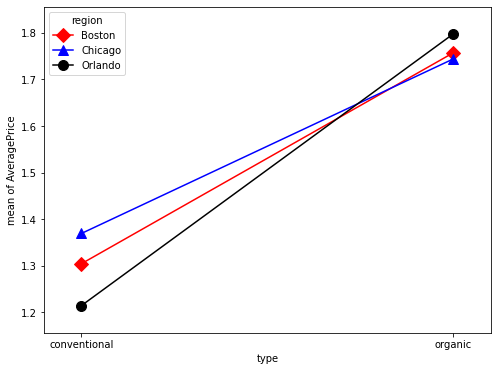

In [31]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

# 독립변수와 종속변수를 별도의 변수에 할당.
avocado_type = avocado['type']
region = avocado['region']
AveragePrice = avocado['AveragePrice']

flg, ax = plt.subplots(figsize=(8,6))
fig = interaction_plot(avocado_type, region, AveragePrice, colors=['red', 'blue','black'], 
                       markers=['D', '^', 'o'], ms=10, ax=ax)
plt.show()

<AxesSubplot:xlabel='region', ylabel='AveragePrice'>

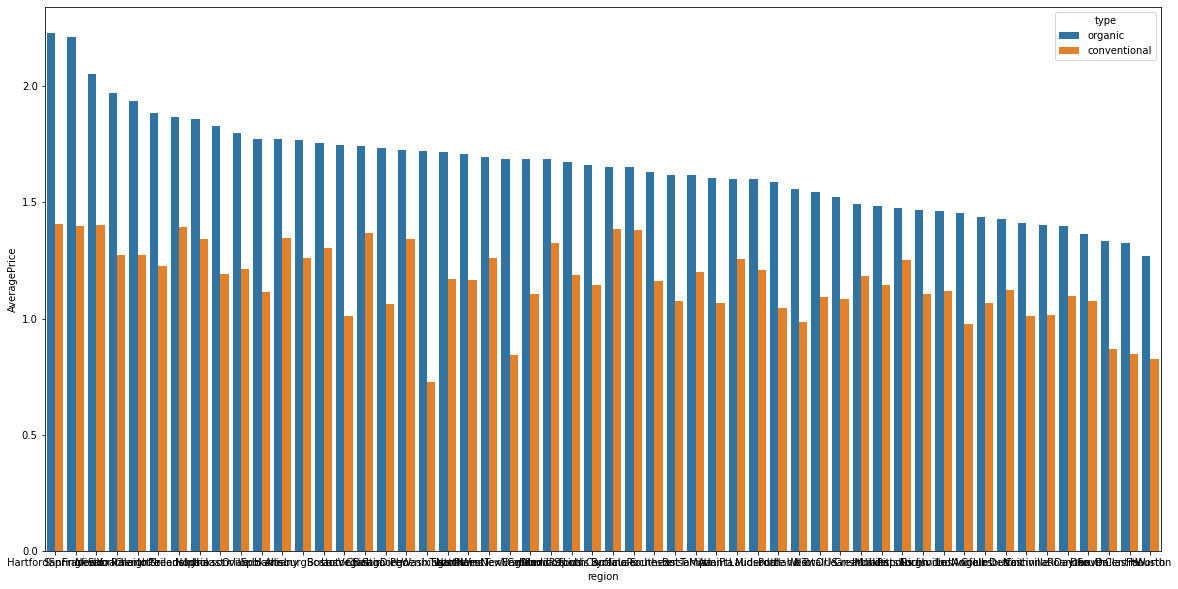

In [ ]:
# 지역별 선호도 확인 
import seaborn as sns
plt.figure(figsize=(20,10))
g = ['type', 'region']
avocado_g = avocado.groupby(g)['AveragePrice'].mean().to_frame().sort_values('AveragePrice',ascending=False).reset_index(['region','type']).set_index('region')
sns.barplot(data = avocado_g, x= avocado_g.index ,y='AveragePrice',hue = 'type')

In [ ]:
# 한눈에 파악이 어려우니, 갭차이를 큰순서부터 정렬할 수 있는 테이블을 생성한다.
avocado_g2 = avocado_g.reset_index()
region_u = avocado_g2.region.unique()


def avo_f3(df,i):
    return (df[(df['region']== region_u[i])&(df['type']=='organic')].AveragePrice.values - df[(df['region']== region_u[i])&(df['type']=='conventional')].AveragePrice.values)[0]
def avo_f2(df,i):
    return (df[(df['region']== region_u[i])&(df['type']=='conventional')].AveragePrice.values)[0]
def avo_f1(df,i):
    return (df[(df['region']== region_u[i])&(df['type']=='organic')].AveragePrice.values)[0]


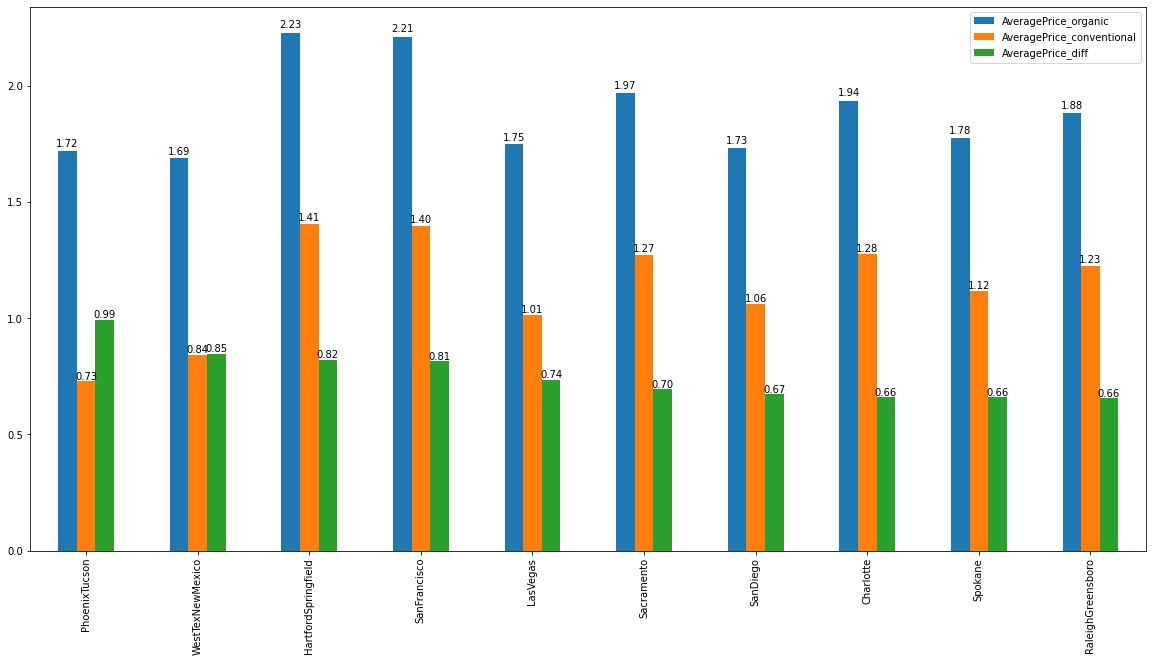

In [ ]:
avo_dic = {r: [avo_f1(avocado_g2, idx),avo_f2(avocado_g2, idx),avo_f3(avocado_g2, idx)] for idx, r in enumerate(region_u)}
avocado_g3 = pd.DataFrame(avo_dic).T
avocado_g3.columns = ['AveragePrice_organic','AveragePrice_conventional','AveragePrice_diff']
ax = avocado_g3.sort_values('AveragePrice_diff', ascending=False)[:10].plot(kind='bar', figsize=(20,10))
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(f"{height:.2f}", (left+width/2, height*1.01), ha='center')


PhoenixTucsion, WestnewMexico 등이 갭이 큰 것을 확인

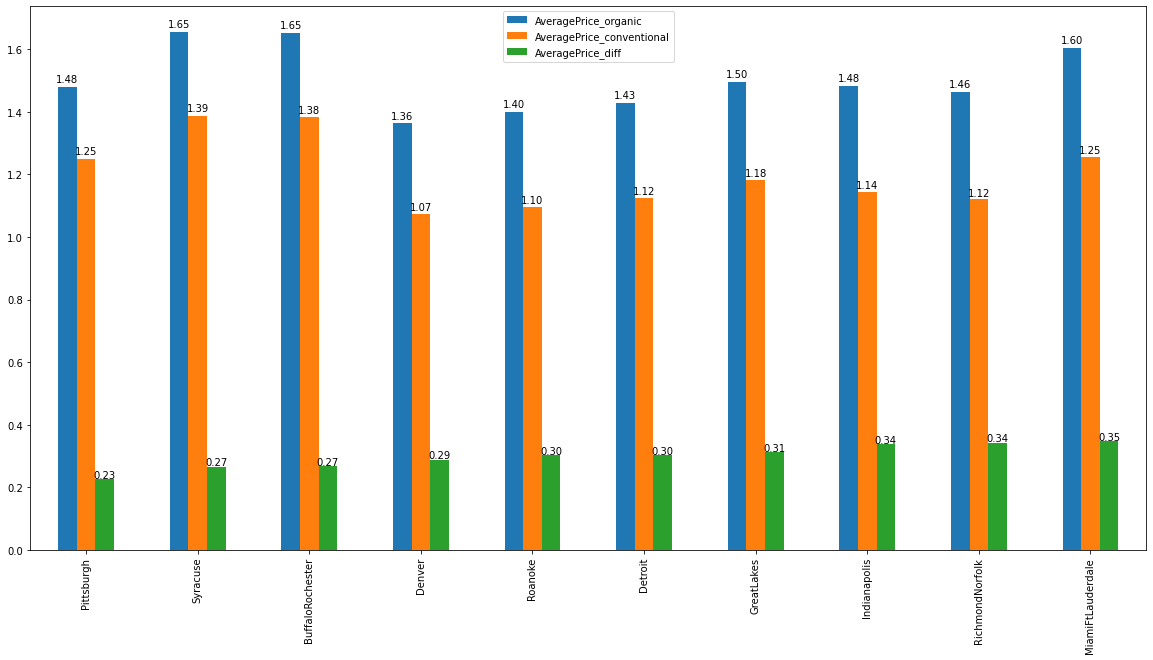

In [ ]:
ax = avocado_g3.sort_values('AveragePrice_diff', ascending=True)[:10].plot(kind='bar', figsize=(20,10))
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(f"{height:.2f}", (left+width/2, height*1.01), ha='center')

반면, 차이가 적게 나는 순위도 확인

In [ ]:
avocado_g3.describe() 

,AveragePrice_organic,AveragePrice_conventional,AveragePrice_diff
count,54.000000,54.000000,54.000000
mean,1.654010,1.158040,0.495970
std,0.205752,0.162290,0.162272
min,1.270769,0.728225,0.227337
25%,1.486154,1.070104,0.376154
50%,1.657041,1.164260,0.470799
75%,1.755266,1.270533,0.578388
max,2.229231,1.408047,0.992426


organic은 1.7, convetional은 1.2로 평균 0.5의 차이 발생하는 것을 알수 있음